In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import geoplot as gp
#from pandas_profiling import ProfileReport # not working
import matplotlib.pyplot as plt
%matplotlib inline

### Health Data
Looks like this is a DF of health establishments detailing the facilities available and some location data.

In [2]:
health_df_raw = pd.read_csv('data/health.csv', index_col = 'facility_name')

In [13]:
# health_profile = ProfileReport(health_df_raw) # some sort of pandas incompatability error

In [3]:
health_df_raw.head()

,facility_type_display,maternal_health_delivery_services,emergency_transport,skilled_birth_attendant,num_chews_fulltime,phcn_electricity,c_section_yn,child_health_measles_immun_calc,num_nurses_fulltime,num_nursemidwives_fulltime,...,antenatal_care_yn,family_planning_yn,malaria_treatment_artemisinin,sector,formhub_photo_id,gps,survey_id,unique_lga,latitude,longitude
facility_name,,,,,,,,,,,,,,,,,,,,,
HEALTH POST KAGBANG,Health Post,True,True,False,1.0,True,False,True,0.0,0.0,...,True,False,True,health,1393335750723.jpg,6.54340807 9.08470312 218.8000030517578 5.0,451a0efb-5fa6-4bad-93cd-7cf19eb50833,cross_river_obudu,6.543408,9.084703
Alhari Clinic,Primary Health Centre (PHC),True,True,True,4.0,True,False,True,1.0,1.0,...,True,False,True,health,1393316873034.jpg,9.00720861 7.67780798 432.8999938964844 5.0,5ddb68d6-02d2-44de-9df3-ebc840a1da42,nasarawa_karu,9.007209,7.677808
Primary health centre umukuru okehi,Basic Health Centre / Primary Health Clinic,True,True,True,2.0,True,True,True,4.0,11.0,...,True,True,True,health,1393594715772.jpg,5.1297 7.1592 73.3 5,2173b656-14eb-400d-9eef-76830379b065,rivers_etche,5.129700,7.159200
PHC EHOM CENTRAL,Primary Health Centre (PHC),True,False,False,2.0,False,False,True,0.0,0.0,...,True,True,True,health,1393330657159.jpg,5.4633 8.1464 117.8 5,963abf9d-5a72-4b35-811e-9c1830adc88b,cross_river_biase,5.463300,8.146400
Health post,Health Post,True,False,False,0.0,False,False,True,0.0,0.0,...,True,True,True,health,1393342042946.jpg,5.504 8.0251 52.4 5,9d09aaac-578c-4a48-a054-dee678a05422,cross_river_biase,5.504000,8.025100


### COVID cases: Dates, locations and patient details for COVID cases
dates need parsing

In [4]:
covid_df_raw = pd.read_csv('https://raw.githubusercontent.com/dsfsi/covid19africa/master/data/line_lists/line-list-nigeria.csv',
                          index_col = ['case_id'])

In [18]:
covid_df_raw.head()

,origin_case_id,date,age,gender,city,province/state,country,current_status,source,symptoms,date_onset_symptoms,date_admission_hospital,date_confirmation,underlying_conditions,travel_history_dates,travel_history_location,death_date,notes_for_discussion,Unnamed: 19
case_id,,,,,,,,,,,,,,,,,,,
1,NaN,2/27/2020,44,Male,Ogun,Ogun,Nigeria,In recovery,www.bbc.com,NaN,NaN,2/27/2020,27-Feb-20,No,NaN,Italy,NaN,Patient came in from Italy.,NaN
2,NaN,03/09/2020,NaN,NaN,Ogun,Ogun,Nigeria,In treatment,https://twitter.com/NCDCgov/status/12376418124...,NaN,03/09/2020,03/09/2020,03/09/2020,No,NaN,NaN,NaN,NaN,NaN
3,NaN,3/16/2020,30,Female,Lagos,Lagos,Nigeria,Clinically Stable,https://twitter.com/NCDCgov/status/12398485450...,"Fever, Cold, Cough",NaN,3/17/2020,3/17/2020,NaN,13-Mar-20,United Kingdom,NaN,Patient returned from trip to UK and was in 14...,NaN
4,NaN,3/16/2020,58,Male,Lagos,Lagos,Nigeria,NaN,https://twitter.com/NCDCgov/status/12405579967...,NaN,NaN,NaN,NaN,NaN,13-Mar-20,USA,NaN,Patient returned from travel to USA,NaN
5,NaN,3/16/2020,38,Female,NaN,Ekiti,Nigeria,NaN,https://twitter.com/NCDCgov/status/12405579967...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Patient made contact with traveler from the USA,NaN


In [6]:
covid = covid_df_raw.copy()

covid['date'] = pd.to_datetime(covid_df_raw['date'])

In [10]:
covid.set_index('date', inplace=True)

In [19]:
covid.agg('count')

origin_case_id                0
age                          10
gender                       12
city                         16
province/state             6401
country                    6401
current_status              381
source                     6401
symptoms                    384
date_onset_symptoms           1
date_admission_hospital       4
date_confirmation            27
underlying_conditions         4
travel_history_dates         15
travel_history_location      32
death_date                    1
notes_for_discussion         39
Unnamed: 19                   2
dtype: int64

,origin_case_id,date,age,gender,city,province/state,country,current_status,source,symptoms,date_onset_symptoms,date_admission_hospital,date_confirmation,underlying_conditions,travel_history_dates,travel_history_location,death_date,notes_for_discussion,Unnamed: 19
case_id,,,,,,,,,,,,,,,,,,,
1,NaN,2020-02-27,44,Male,Ogun,Ogun,Nigeria,In recovery,www.bbc.com,NaN,NaN,2/27/2020,27-Feb-20,No,NaN,Italy,NaN,Patient came in from Italy.,NaN
2,NaN,2020-03-09,NaN,NaN,Ogun,Ogun,Nigeria,In treatment,https://twitter.com/NCDCgov/status/12376418124...,NaN,03/09/2020,03/09/2020,03/09/2020,No,NaN,NaN,NaN,NaN,NaN
3,NaN,2020-03-16,30,Female,Lagos,Lagos,Nigeria,Clinically Stable,https://twitter.com/NCDCgov/status/12398485450...,"Fever, Cold, Cough",NaN,3/17/2020,3/17/2020,NaN,13-Mar-20,United Kingdom,NaN,Patient returned from trip to UK and was in 14...,NaN
4,NaN,2020-03-16,58,Male,Lagos,Lagos,Nigeria,NaN,https://twitter.com/NCDCgov/status/12405579967...,NaN,NaN,NaN,NaN,NaN,13-Mar-20,USA,NaN,Patient returned from travel to USA,NaN
5,NaN,2020-03-16,38,Female,NaN,Ekiti,Nigeria,NaN,https://twitter.com/NCDCgov/status/12405579967...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Patient made contact with traveler from the USA,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6397,NaN,2020-05-19,NaN,NaN,NaN,Bauchi,Nigeria,NaN,https://twitter.com/NCDCgov/status/12628754606...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6398,NaN,2020-05-19,NaN,NaN,NaN,Gombe,Nigeria,NaN,https://twitter.com/NCDCgov/status/12628754606...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6399,NaN,2020-05-19,NaN,NaN,NaN,Gombe,Nigeria,NaN,https://twitter.com/NCDCgov/status/12628754606...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Population data


In [ ]:
# read data from files
nga_adm0_2020_df_raw = pd.read_csv('https://data.humdata.org/dataset/a7c3de5e-ff27-4746-99cd-05f2ad9b1066/resource/4710c51c-813b-481f-bb4e-ffb593e6f126/download/nga_admpop_adm0_2020.csv')
nga_adm1_2020_df_raw = pd.read_csv('https://data.humdata.org/dataset/a7c3de5e-ff27-4746-99cd-05f2ad9b1066/resource/d9fc551a-b5e4-4bed-9d0d-b047b6961817/download/nga_admpop_adm1_2020.csv')
nga_adm2_2020_df_raw = pd.read_csv('https://data.humdata.org/dataset/a7c3de5e-ff27-4746-99cd-05f2ad9b1066/resource/562e7757-0683-4d61-87bd-a7c94af2ee38/download/nga_admpop_adm2_2020.csv')


#### WHOLE COUNTRY


In [22]:
nga_adm0_2020_df_raw

,ADM0_NAME,ADM0_PCODE,F_TL,M_TL,T_TL,F_00_04,F_05_09,F_10_14,F_15_19,F_20_24,...,T_35_39,T_40_44,T_45_49,T_50_54,T_55_59,T_60_64,T_65_69,T_70_74,T_75_79,T_80Plus
0,NIGERIA,NG,100473260,104435960,204909220,15713253,13740497,12305947,10974474,9109497,...,11462880,9544981,7514275,5941812,4697628,3586657,2691997,1907879,1142924,752680


#### ADMIN LEVEL 1

In [23]:

# Nigeria administrative level 1 (state) 2016 projected population statistics
nga_adm1_2020_df_raw.head()

,ADM0_NAME,ADM0_PCODE,ADM1_NAME,ADM1_PCODE,F_TL,M_TL,T_TL,F_00_04,F_05_09,F_10_14,...,T_35_39,T_40_44,T_45_49,T_50_54,T_55_59,T_60_64,T_65_69,T_70_74,T_75_79,T_80Plus
0,NIGERIA,NG,ABIA,NG001,1937239,1941738,3878977,210483,215867,248705,...,222947,194133,175852,134694,126513,84071,78976,48921,35513,19470
1,NIGERIA,NG,ADAMAWA,NG002,2168252,2228347,4396599,372760,320576,273011,...,225579,188995,143381,116482,94120,72897,58057,46415,27654,17161
2,NIGERIA,NG,AKWA IBOM,NG003,2789212,2876552,5665764,326260,342223,353787,...,340402,288166,256081,190410,160830,125151,98786,53539,32155,15171
3,NIGERIA,NG,ANAMBRA,NG004,2932876,3003908,5936784,319470,334304,379733,...,350214,302323,270660,201279,185087,122166,110187,64398,48022,23577
4,NIGERIA,NG,BAUCHI,NG005,3272516,3417618,6690134,639299,509011,402259,...,322124,276823,193548,172873,109191,101830,60952,58276,31020,23856


#### ADMIN LEVEL 2

In [58]:
# Nigeria administrative level 2 (local government area) 2016 projected population statistics
nga_adm2_2020_df_raw.head(3)

,ADM0_NAME,ADM0_PCODE,ADM1_NAME,ADM1_PCODE,ADM2_NAME,ADM2_PCODE,F_TL,M_TL,T_TL,F_00_04,...,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77
0,NIGERIA,NG,ABIA,NG001,ABA NORTH,NG001001,57686,57619,115305,6388,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NIGERIA,NG,ABIA,NG001,ABA SOUTH,NG001002,185314,199626,384940,19222,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NIGERIA,NG,ABIA,NG001,AROCHUKWU,NG001003,126730,128709,255439,13544,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Boundary geodata from Geo database

Geo data for Nigeria from ESRI Geo database  
Read the GDB into a geopandas df   
Looks like polygon boundaries for admin layers

In [46]:
# Read data
country_geodata = gpd.read_file('data/nga_admbnda_osgof_eha_itos.gdb', layer = 0) # country
admin_1_geodata = gpd.read_file('data/nga_admbnda_osgof_eha_itos.gdb', layer = 1) # ADM1
admin_2_geodata = gpd.read_file('data/nga_admbnda_osgof_eha_itos.gdb', layer = 2) # ADM2


In [47]:
country_geodata.head()

,admin0Name_en,admin0Pcode,admin0RefName,admin0AltName1_en,admin0AltName2_en,date,validOn,validTo,Shape_Length,Shape_Area,geometry
0,Nigeria,NG,Nigeria,None,None,2016-11-29 00:00:00+00:00,2016-12-15 00:00:00+00:00,NaT,47.959164,75.002123,"MULTIPOLYGON (((8.34482 4.61140, 8.34496 4.609..."


In [48]:

admin_1_geodata.head(2)

,admin1Name_en,admin1Pcode,admin1RefName,admin1AltName1_en,admin1AltName2_en,admin0Name_en,admin0Pcode,date,validOn,validTo,Shape_Length,Shape_Area,geometry
0,Abia,NG001,Abia,None,None,Nigeria,NG,2016-11-29 00:00:00+00:00,2016-12-15 00:00:00+00:00,NaT,4.695135,0.396543,"MULTIPOLYGON (((7.38681 6.03667, 7.38729 6.036..."
1,Adamawa,NG002,Adamawa,None,None,Nigeria,NG,2016-11-29 00:00:00+00:00,2016-12-15 00:00:00+00:00,NaT,11.525443,3.113007,"MULTIPOLYGON (((13.62129 10.94823, 13.62592 10..."


In [49]:
admin_2_geodata.head(2)

,admin2Name_en,admin2Pcode,admin2RefName,admin2AltName1_en,admin2AltName2_en,admin1Name_en,admin1Pcode,admin0Name_en,admin0Pcode,date,validOn,ValidTo,Shape_Length,Shape_Area,geometry
0,Aba North,NG001001,Aba North,None,None,Abia,NG001,Nigeria,NG,2016-11-29 00:00:00+00:00,2017-02-22 00:00:00+00:00,NaT,0.237074,0.001524,"MULTIPOLYGON (((7.40111 5.08195, 7.40013 5.082..."
1,Aba South,NG001002,Aba South,None,None,Abia,NG001,Nigeria,NG,2016-11-29 00:00:00+00:00,2017-02-22 00:00:00+00:00,NaT,0.262477,0.003531,"MULTIPOLYGON (((7.38749 5.08275, 7.38632 5.082..."


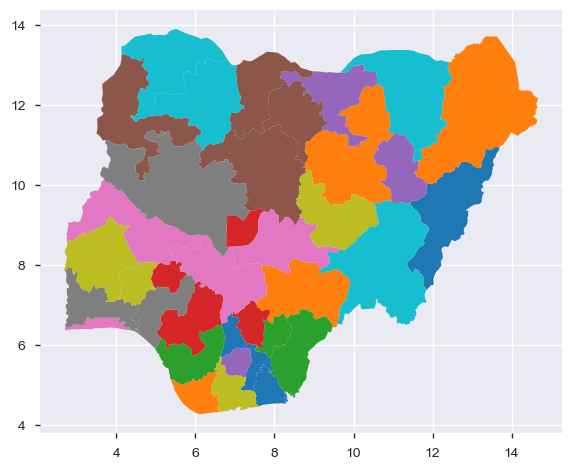

In [55]:
admin_1_geodata.plot(column = 'admin1Pcode', legend = False);

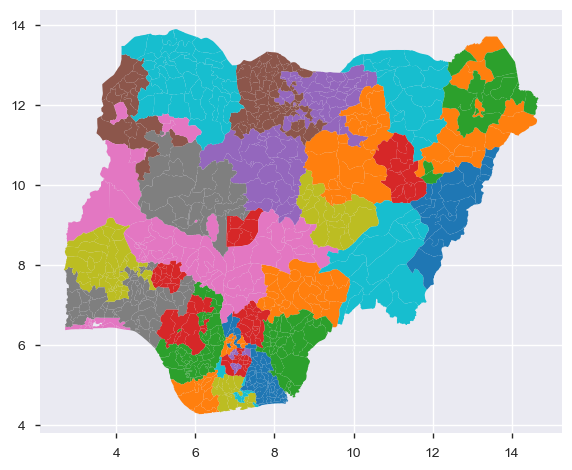

In [53]:
admin_2_geodata.plot(column = 'admin2Pcode');